#LAB 9 Gale-Shapley and Irving Algorithms
*   Danier Elian Gonzalez Ordóñez (dgonzalezo@unal.edu.co)


##1.Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

###Theoretically the worst case is defined as O(n)= n(n-1)+1
###O(4)=13
###O(40)=1561
###And the best case is defined as O(n)=n
###O(4)=4
###O(40)=40

In [34]:
import math
import pandas as pd
import numpy as np
from random import shuffle
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

##Fill worst case preferences

In [20]:
def fillWorstCase(N):
  
  preferS = []
  
  # Woman list
  preferW = [i+N for i in range(N)]
  preferS.append(preferW[:])
  for i in range(N-1):
    listaux = preferW[1:N-1]
    elemaux = preferW[0]
    preferW[N-2] = elemaux
    preferW[0:N-2] = listaux[:]
    preferS.append(preferW[:])

  # Man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferS.append(preferM[:])
  return preferS

##Fill best case preferences

In [27]:
def FillbestCases(N):

  preferBS = []

  # Woman list
  preferW = [i+N for i in range(N)]
  for i in range(N):
    ax = preferW.pop(0)
    preferW.append(ax)
    preferBS.append(preferW[:])

  # Man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferBS.append(preferM[:]) 
  return preferBS

##Algorithm
Taken from
https://www.geeksforgeeks.org/stable-marriage-problem/

In [49]:
def wPrefersM1OverM(prefer, w, m, m1, N): 
    for i in range(N): 
        if (prefer[w][i] == m1): 
            return True
  
        if (prefer[w][i] == m): 
            return False
def stableMarriage(prefer,N): 
    wPartner = [-1 for i in range(N)] 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
    c=0

    while (freeCount > 0): 
        c=c+1
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 

            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                m1 = wPartner[w - N] 
  
                if (wPrefersM1OverM(prefer, w, m, m1,N) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
    print("Iterations= ", c)
    print("Woman ", " Man") 
    return c
    for i in range(N): 
        print(i + N, "\t", wPartner[i]) 

###Worst case algorithm with n=4

In [24]:
worstCasePrefer=fillWorstCase(4)
stableMarriage(worstCasePrefer, 4)

Iterations=  13
Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0


###Worst case algorithm with n=40

In [25]:
worstCasePrefer=fillWorstCase(40)
stableMarriage(worstCasePrefer, 40)

Iterations=  1561
Woman   Man
40 	 1
41 	 2
42 	 3
43 	 4
44 	 5
45 	 6
46 	 7
47 	 8
48 	 9
49 	 10
50 	 11
51 	 12
52 	 13
53 	 14
54 	 15
55 	 16
56 	 17
57 	 18
58 	 19
59 	 20
60 	 21
61 	 22
62 	 23
63 	 24
64 	 25
65 	 26
66 	 27
67 	 28
68 	 29
69 	 30
70 	 31
71 	 32
72 	 33
73 	 34
74 	 35
75 	 36
76 	 37
77 	 38
78 	 39
79 	 0


###Best case algorithm with n=4

In [29]:
bestCasePrefer=FillbestCases(4)
stableMarriage(bestCasePrefer, 4)

Iterations=  4
Woman   Man
4 	 3
5 	 0
6 	 1
7 	 2


###Best case algorithm with n=40

In [30]:
bestCasePrefer=FillbestCases(40)
stableMarriage(bestCasePrefer, 40)

Iterations=  40
Woman   Man
40 	 39
41 	 0
42 	 1
43 	 2
44 	 3
45 	 4
46 	 5
47 	 6
48 	 7
49 	 8
50 	 9
51 	 10
52 	 11
53 	 12
54 	 13
55 	 14
56 	 15
57 	 16
58 	 17
59 	 18
60 	 19
61 	 20
62 	 21
63 	 22
64 	 23
65 	 24
66 	 25
67 	 26
68 	 27
69 	 28
70 	 29
71 	 30
72 	 31
73 	 32
74 	 33
75 	 34
76 	 35
77 	 36
78 	 37
79 	 38


#2.Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [54]:
def randomAlgorithm(N):
  hist=[]
  for i in range(100):
    list=[]
    Mprefer=[i for i in range(N)]
    M = Mprefer[:]
    Wprefer = [i+N for i in range(N)]
    W = Wprefer[:]
    for j in range(N):
      shuffle(W)
      list.append(W[:])
    for l in range(N):
      shuffle(M)
      list.append(M[:])
    k=stableMarriage(list,N)
    hist.append(k)
  print("Minimun number of iterations: {}".format(min(hist)))
  print("Maximun number of iterations: {}".format(max(hist)))
  print("Average number of iterations: {}".format(sum(hist)/100))

  t = "Distribution of the number of iterations with N=" + str(N)

  histogram = pd.DataFrame(hist).hist()
  plt.title(t)
  plt.xlabel("iterations")
  plt.ylabel("times")
  plt.show()

##n=4

Iterations=  5
Woman   Man
Iterations=  5
Woman   Man
Iterations=  5
Woman   Man
Iterations=  4
Woman   Man
Iterations=  7
Woman   Man
Iterations=  4
Woman   Man
Iterations=  4
Woman   Man
Iterations=  5
Woman   Man
Iterations=  5
Woman   Man
Iterations=  7
Woman   Man
Iterations=  5
Woman   Man
Iterations=  4
Woman   Man
Iterations=  4
Woman   Man
Iterations=  5
Woman   Man
Iterations=  6
Woman   Man
Iterations=  4
Woman   Man
Iterations=  4
Woman   Man
Iterations=  4
Woman   Man
Iterations=  6
Woman   Man
Iterations=  4
Woman   Man
Iterations=  4
Woman   Man
Iterations=  6
Woman   Man
Iterations=  5
Woman   Man
Iterations=  4
Woman   Man
Iterations=  5
Woman   Man
Iterations=  6
Woman   Man
Iterations=  4
Woman   Man
Iterations=  4
Woman   Man
Iterations=  5
Woman   Man
Iterations=  5
Woman   Man
Iterations=  5
Woman   Man
Iterations=  5
Woman   Man
Iterations=  4
Woman   Man
Iterations=  6
Woman   Man
Iterations=  5
Woman   Man
Iterations=  4
Woman   Man
Iterations=  5
Woman   Man
I

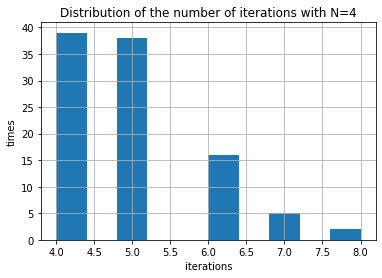

In [59]:
randomAlgorithm(4)

##n=40

Iterations=  77
Woman   Man
Iterations=  79
Woman   Man
Iterations=  94
Woman   Man
Iterations=  64
Woman   Man
Iterations=  80
Woman   Man
Iterations=  57
Woman   Man
Iterations=  91
Woman   Man
Iterations=  84
Woman   Man
Iterations=  81
Woman   Man
Iterations=  78
Woman   Man
Iterations=  75
Woman   Man
Iterations=  80
Woman   Man
Iterations=  70
Woman   Man
Iterations=  71
Woman   Man
Iterations=  91
Woman   Man
Iterations=  75
Woman   Man
Iterations=  98
Woman   Man
Iterations=  79
Woman   Man
Iterations=  67
Woman   Man
Iterations=  68
Woman   Man
Iterations=  80
Woman   Man
Iterations=  79
Woman   Man
Iterations=  78
Woman   Man
Iterations=  63
Woman   Man
Iterations=  57
Woman   Man
Iterations=  65
Woman   Man
Iterations=  71
Woman   Man
Iterations=  64
Woman   Man
Iterations=  83
Woman   Man
Iterations=  87
Woman   Man
Iterations=  103
Woman   Man
Iterations=  88
Woman   Man
Iterations=  67
Woman   Man
Iterations=  91
Woman   Man
Iterations=  76
Woman   Man
Iterations=  74
Wom

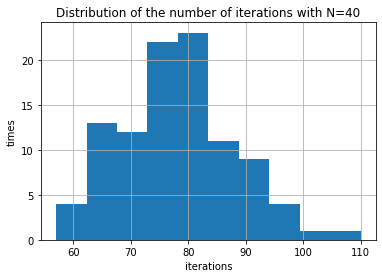

In [58]:
randomAlgorithm(40)